In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_theme(palette='tab10',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.\
builder.\
appName("predictive_maintenance_process").\
config("spark.executor.memory", "1g").\
config("spark.mongodb.read.connection.uri","mongodb+srv://<username>:<password>@cluster0.dbyavcr.mongodb.net/?retryWrites=true&w=majority").\
config("spark.mongodb.write.connection.uri","mongodb+srv://<username>:<password>@cluster0.dbyavcr.mongodb.net/?retryWrites=true&w=majority").\
config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector:10.0.3").\
getOrCreate()

df = spark.read.format("mongodb").option('database', 'predictive_maintenance').option('collection', 'Sensors_Data').load()

df.show()

In [36]:
df = df.toPandas()
df = df.drop(["UDI","Product ID"],axis=1)
df.sample(6).style.set_properties(
    **{
        'background-color': 'Brown',
        'color': 'white',
        'border-color': 'White'
    })

,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Target,Failure Type,dateTime
5758,L,301.900000,311.300000,1501,40.800000,59,0,No Failure,2022-01-22 20:59:50
4024,M,302.100000,311.000000,1351,60.300000,207,1,Overstrain Failure,2022-01-22 18:35:20
7207,M,299.700000,309.600000,1540,34.400000,91,0,No Failure,2022-01-22 23:00:35
6755,M,301.800000,311.100000,1663,31.600000,199,0,No Failure,2022-01-22 22:22:55
861,M,296.100000,306.900000,1951,23.300000,38,0,No Failure,2022-01-22 14:11:45
8995,L,297.200000,308.000000,1474,43.700000,162,0,No Failure,2022-01-23 01:29:35


In [37]:
df["Air temperature K"] = df["Air temperature K"] - 272.15
df["Process temperature K"] = df["Process temperature K"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature K" : "Air temperature C","Process temperature K" : "Process temperature C"},inplace=True)

In [38]:
df["Temperature difference C"] = df["Process temperature C"] - df["Air temperature C"]
df.sample(5)

,Type,Air temperature C,Process temperature C,Rotational speed rpm,Torque Nm,Tool wear min,Target,Failure Type,dateTime,Temperature difference C
1007,M,24.05,35.05,1633,31.1,0,0,No Failure,2022-01-22 14:23:55,11.0
3516,L,29.85,38.95,1402,47.8,182,0,No Failure,2022-01-22 17:53:00,9.1
4195,L,30.35,38.85,1548,38.4,188,0,No Failure,2022-01-22 18:49:35,8.5
2279,L,27.25,36.55,1525,39.0,90,0,No Failure,2022-01-22 16:09:55,9.3
6351,L,27.85,37.55,1542,47.1,25,0,No Failure,2022-01-22 21:49:15,9.7


In [16]:
df.describe().style.background_gradient(cmap="magma")

,Air temperature °C,Process temperature °C,Rotational speed rpm,Torque Nm,Tool wear min,Target,Temperature difference °C
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

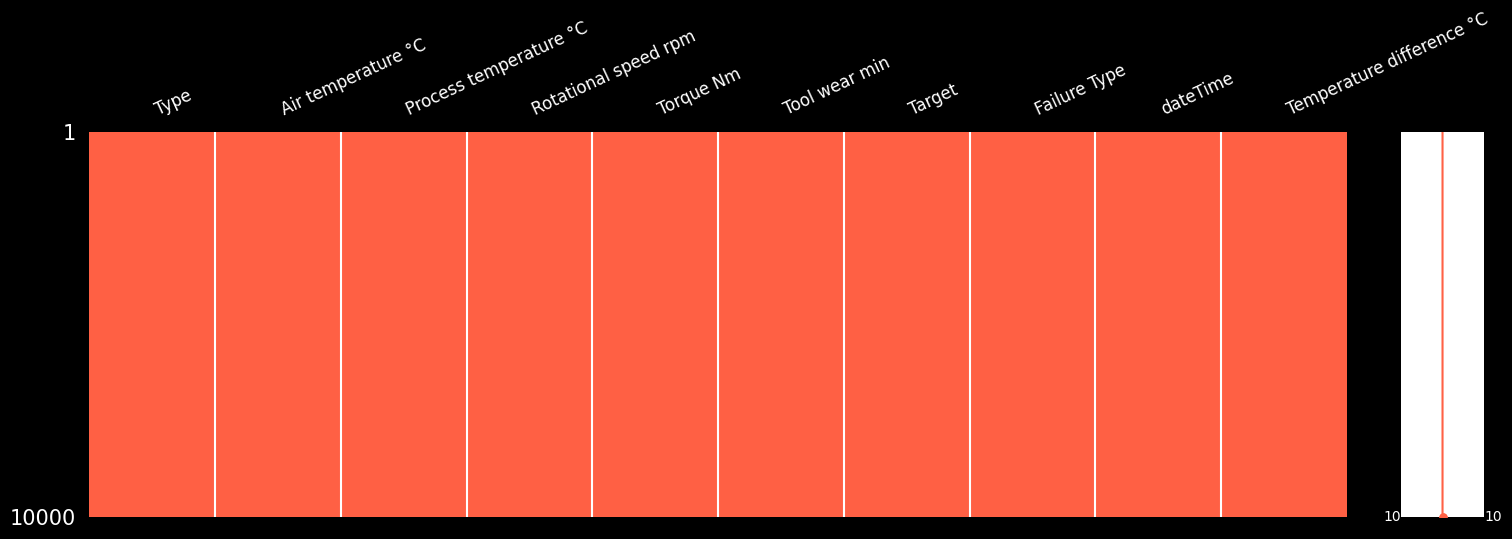

In [17]:

#verifie missing values
import missingno as msno
msno.matrix(df, figsize=(18,5), fontsize=12, color=(1, 0.38, 0.27));
plt.xticks(rotation=25);



findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

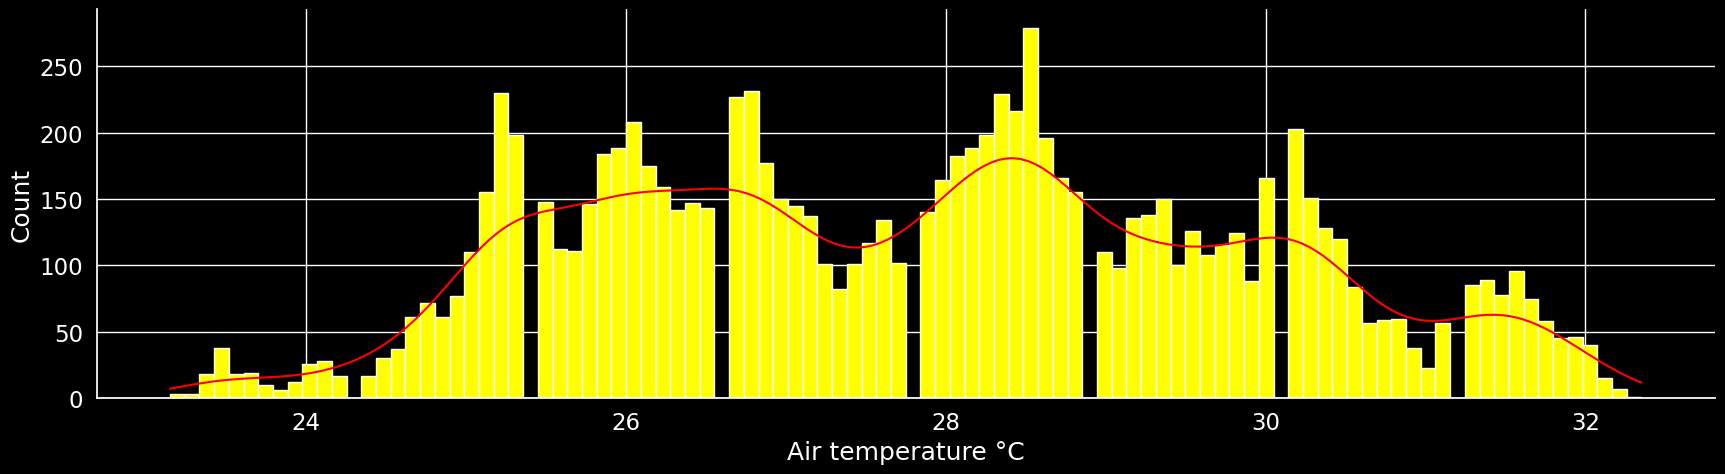

In [18]:
sns.displot(data=df, x="Air temperature °C", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

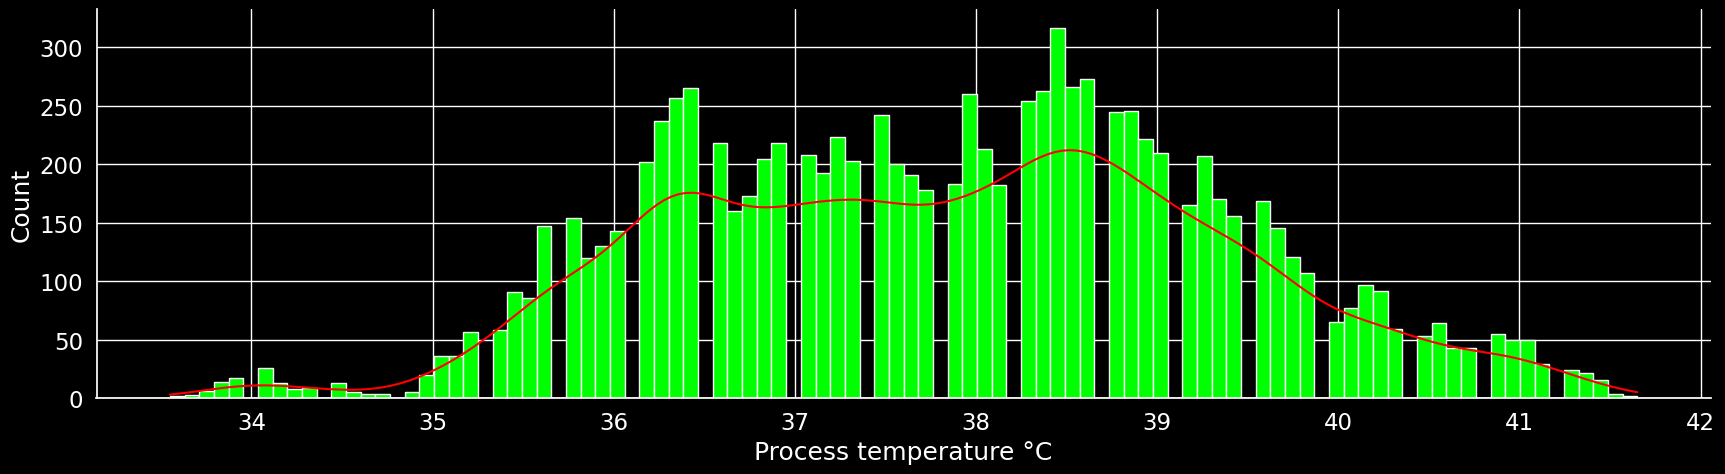

In [19]:
sns.displot(data=df, x="Process temperature °C", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5);

findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

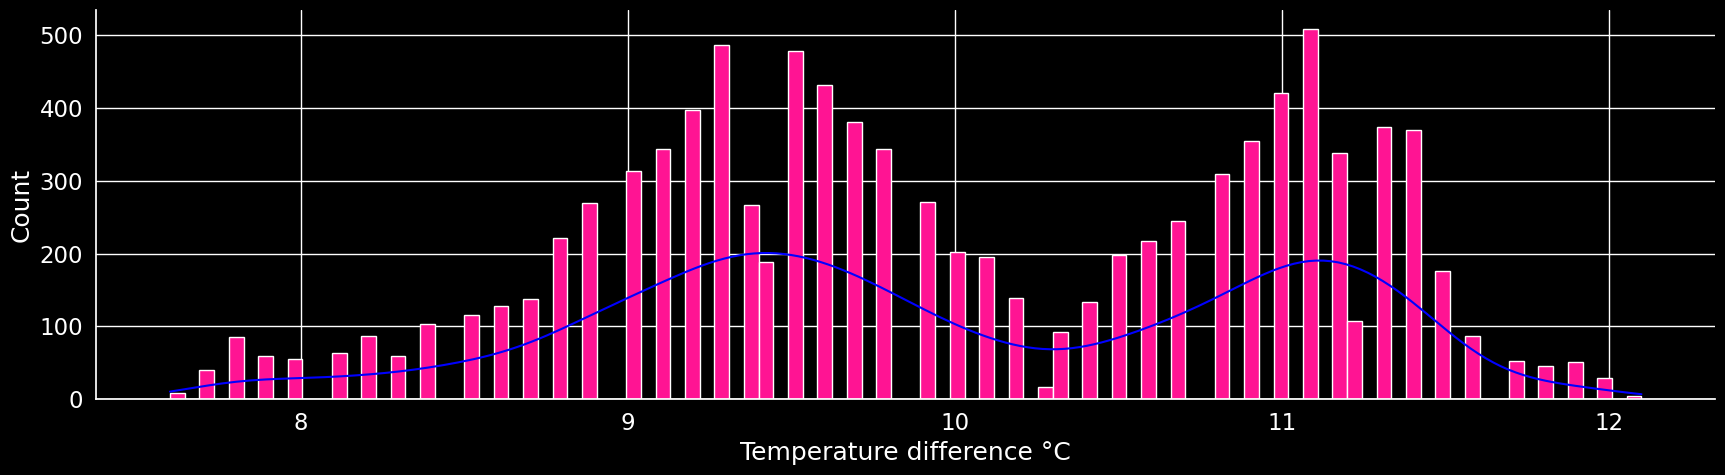

In [20]:
sns.displot(data=df, x="Temperature difference °C", kde=True, bins = 100,color = "blue", facecolor = "DeepPink",height = 5, aspect = 3.5);

In [21]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts()) 
    print("****"*8)

L    6000
M    2997
H    1003
Name: Type, dtype: int64
********************************
0    9661
1     339
Name: Target, dtype: int64
********************************
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64
********************************


findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

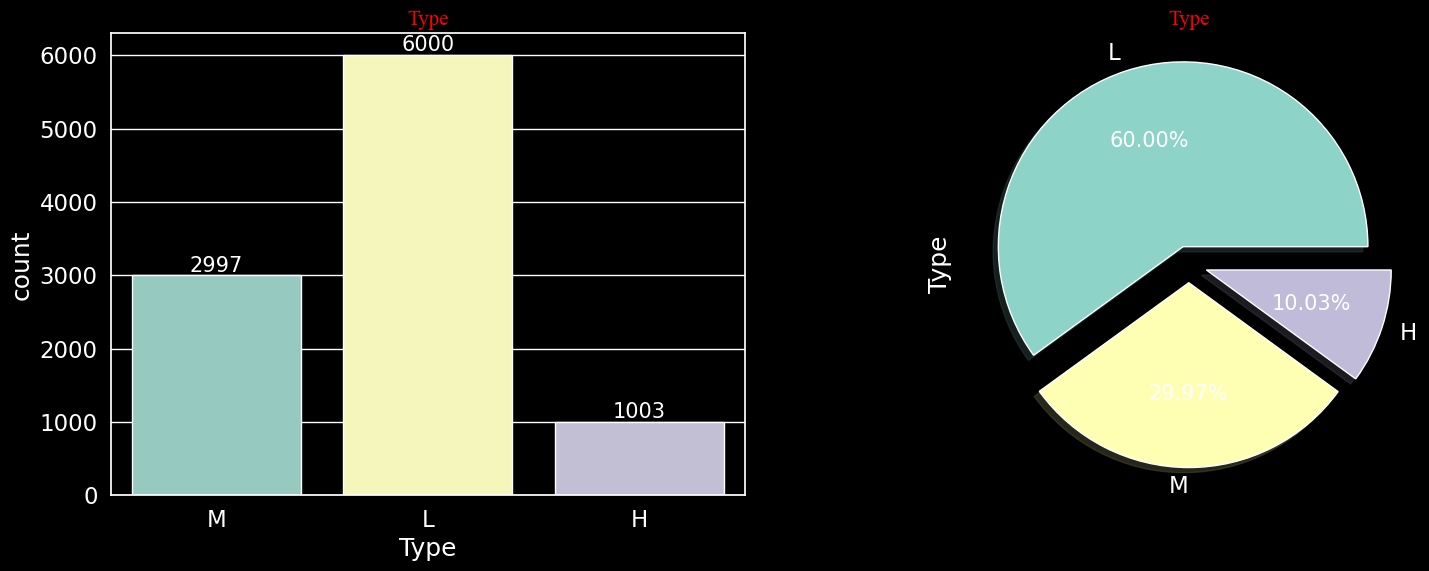

In [22]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

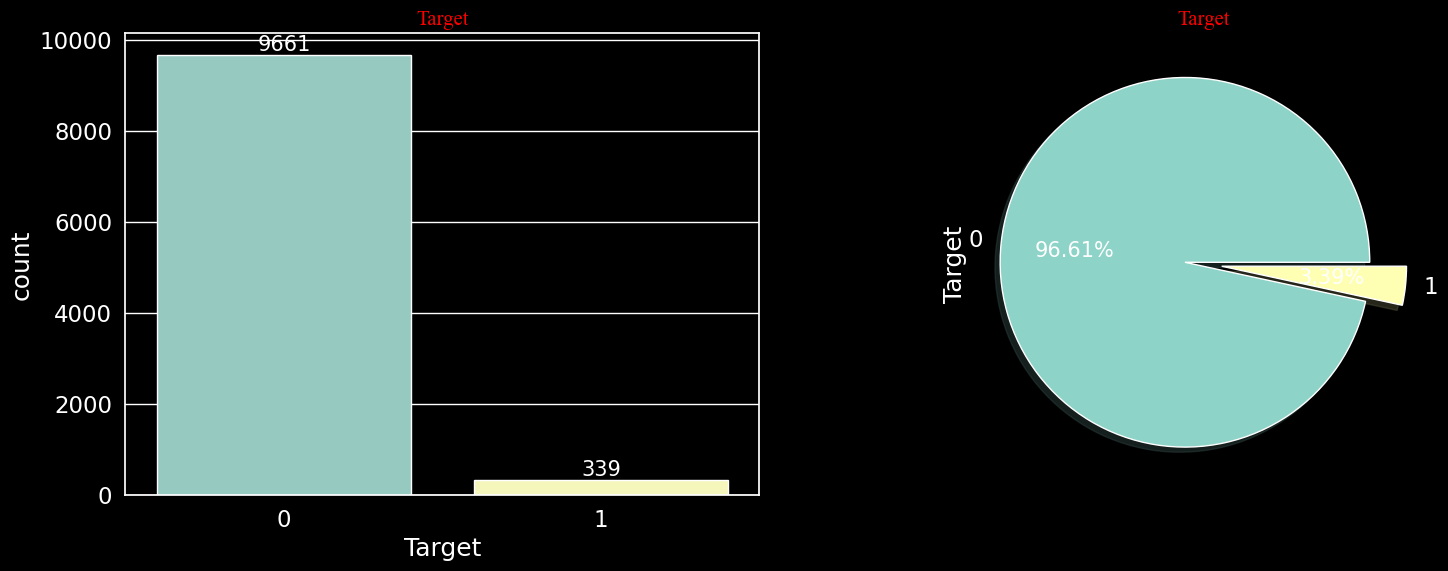

In [23]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='Red',font='Times New Roman');

In [24]:
df.head(2)


,Type,Air temperature °C,Process temperature °C,Rotational speed rpm,Torque Nm,Tool wear min,Target,Failure Type,dateTime,Temperature difference °C
0,M,25.95,36.45,1551,42.8,0,0,No Failure,2022-01-22 13:00:00,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,2022-01-22 13:00:05,10.5


findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

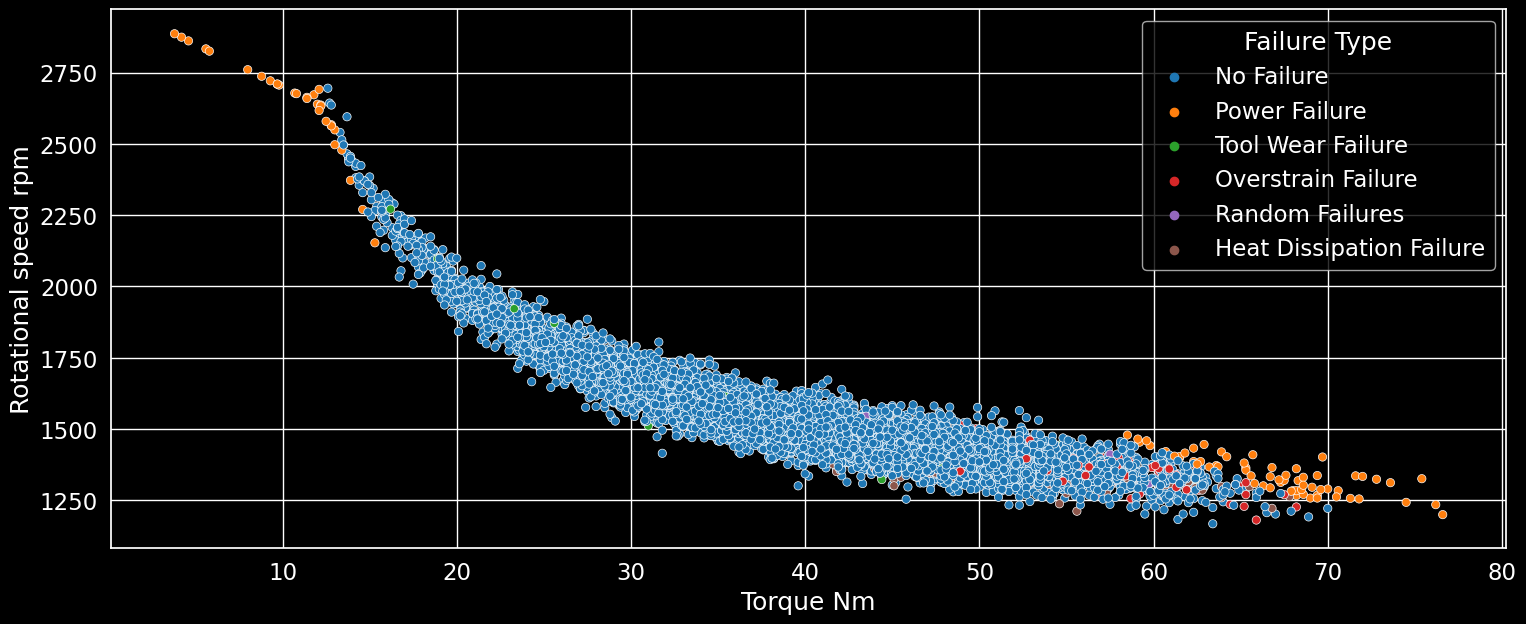

In [25]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque Nm", y="Rotational speed rpm", hue="Failure Type",palette="tab10");

findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

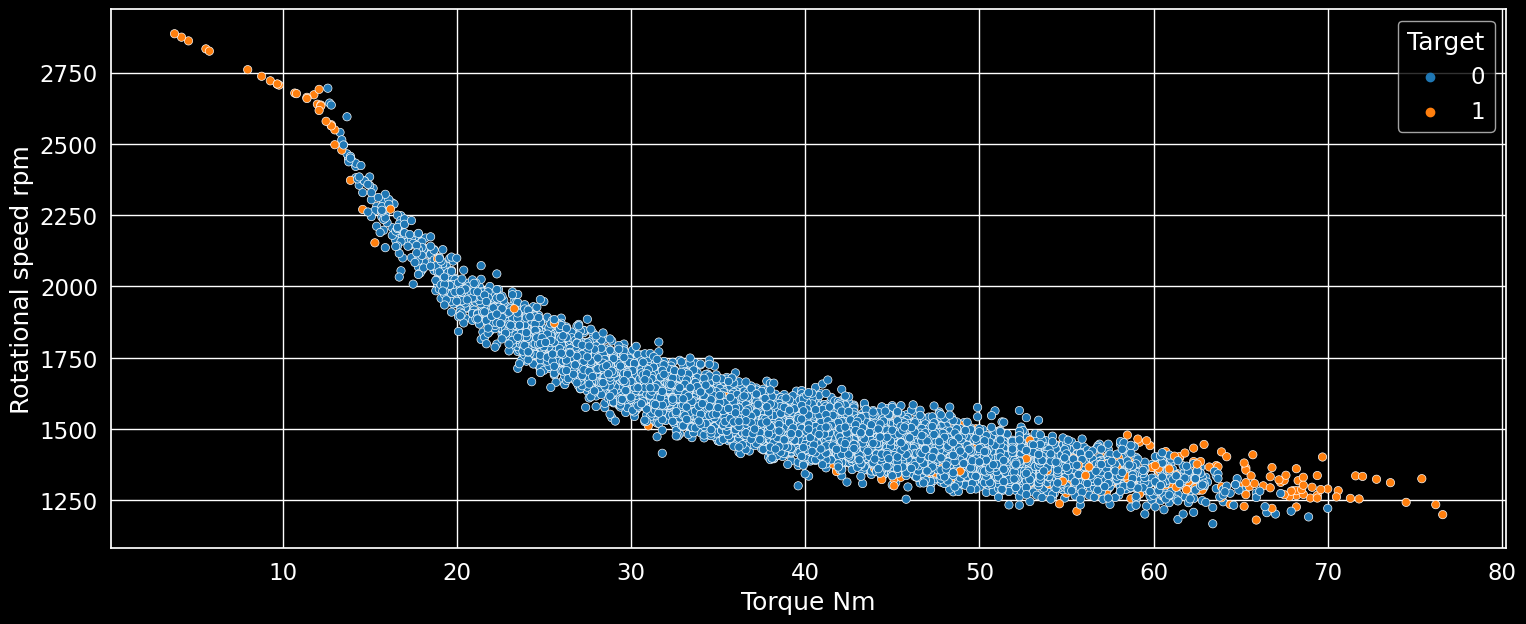

In [26]:


plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque Nm", y="Rotational speed rpm", hue="Target",palette="tab10");


findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

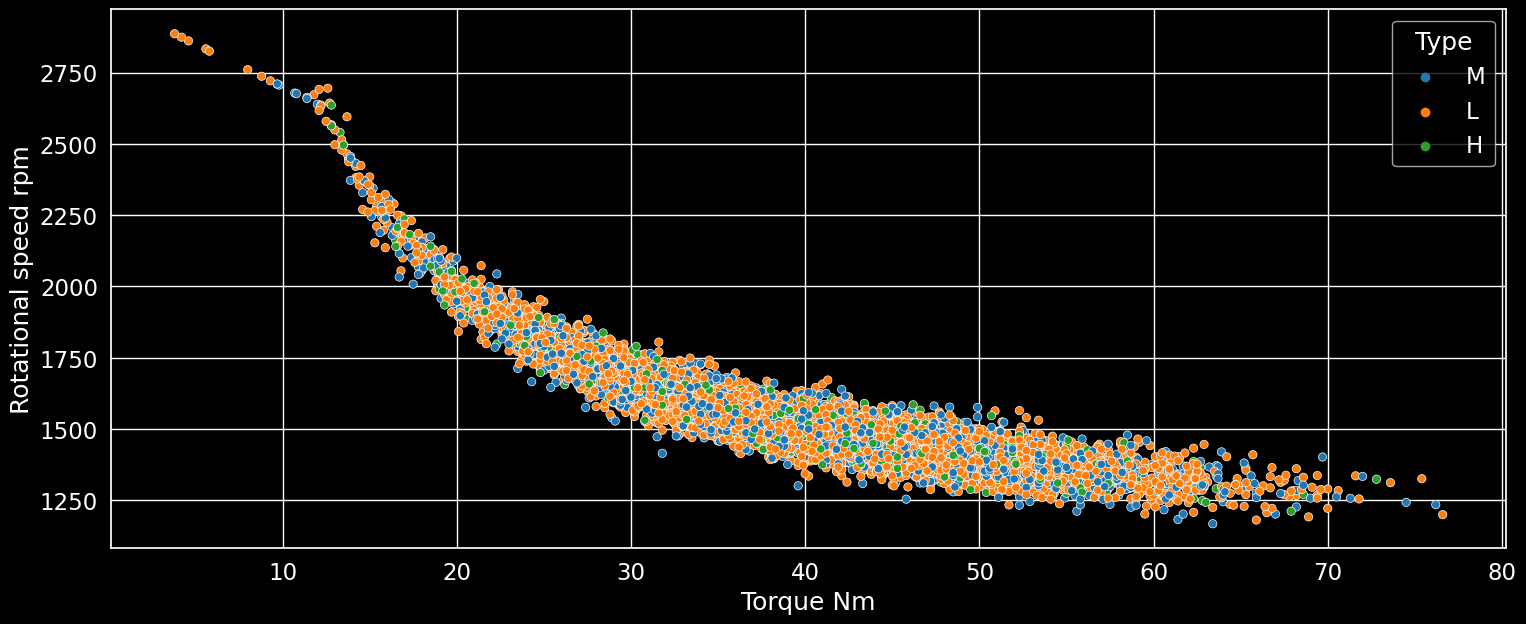

In [27]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque Nm", y="Rotational speed rpm", hue="Type",palette="tab10");

findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

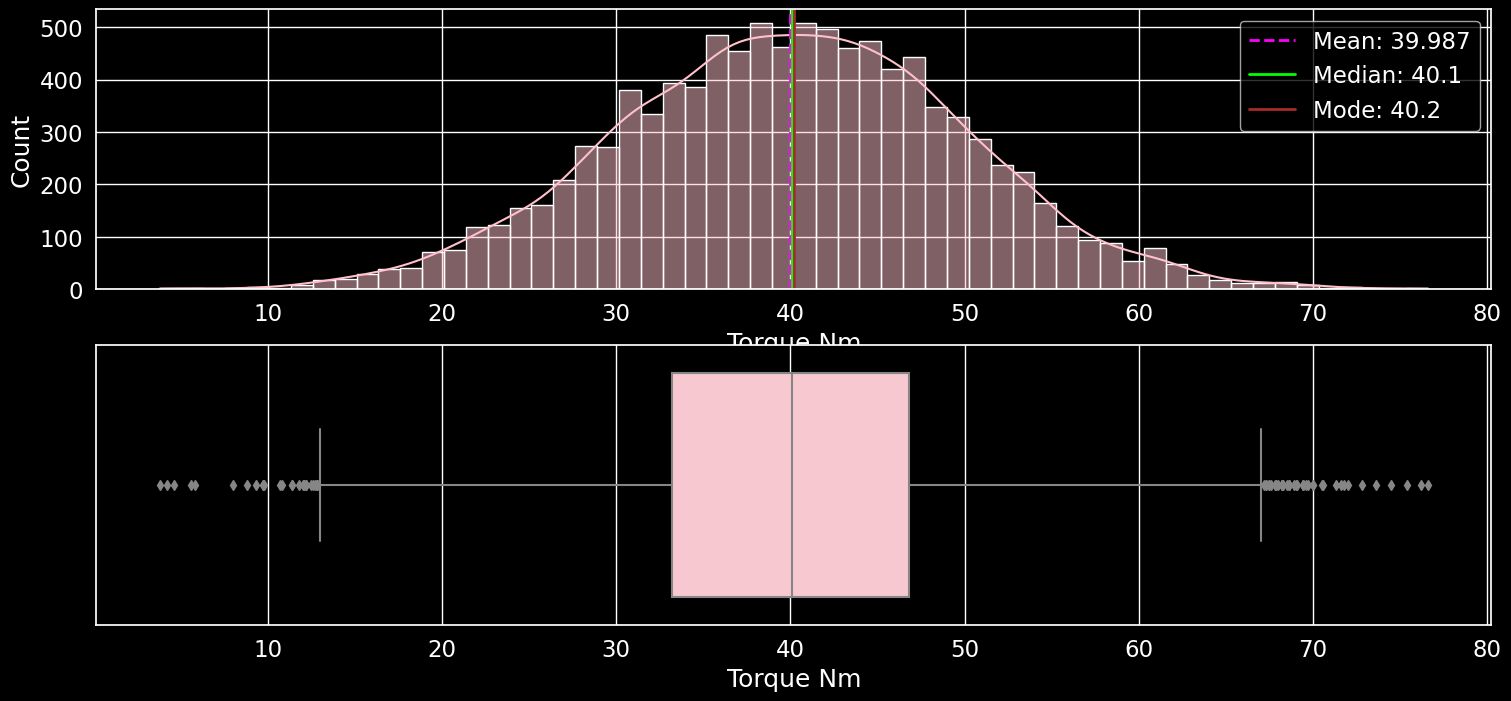

In [28]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='pink')

    ax[0].axvline(x = df[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Torque Nm')

findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

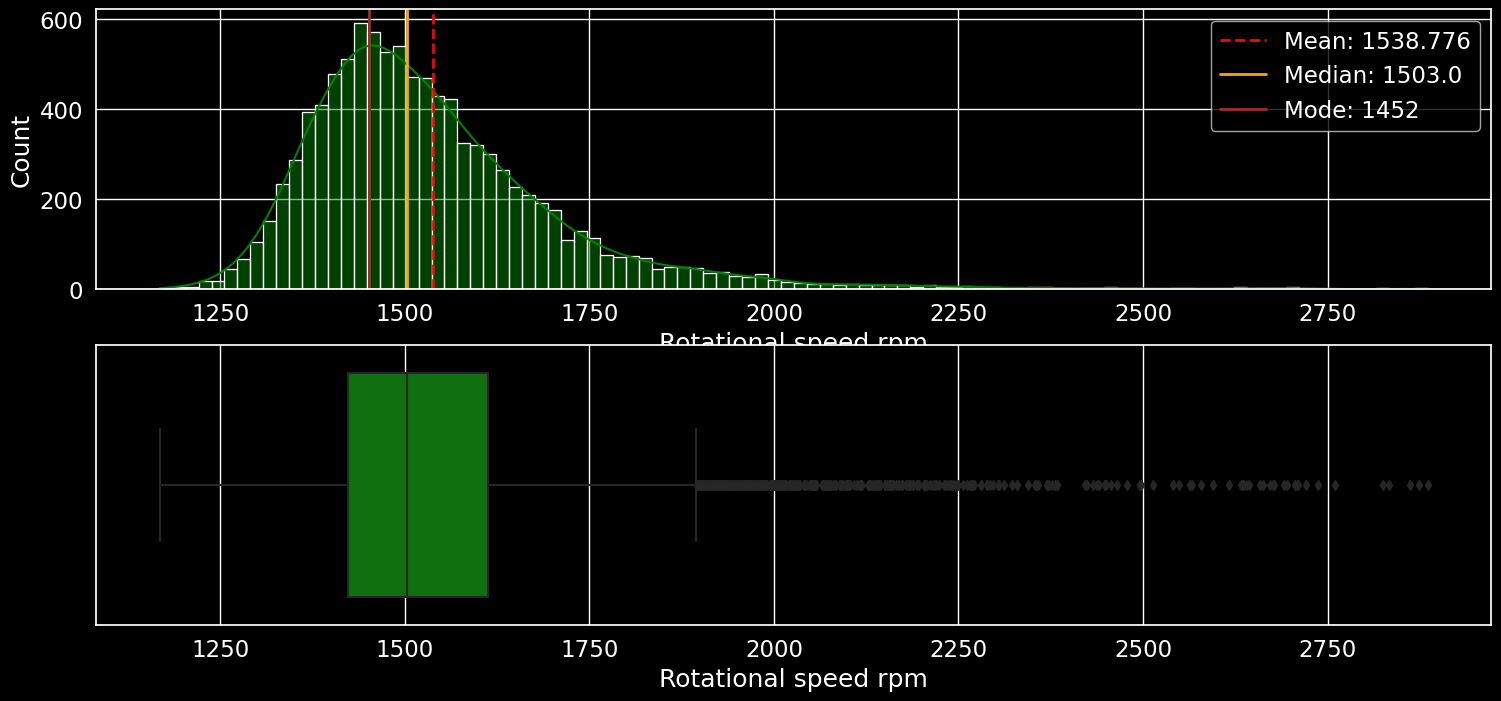

In [29]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Rotational speed rpm')

findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

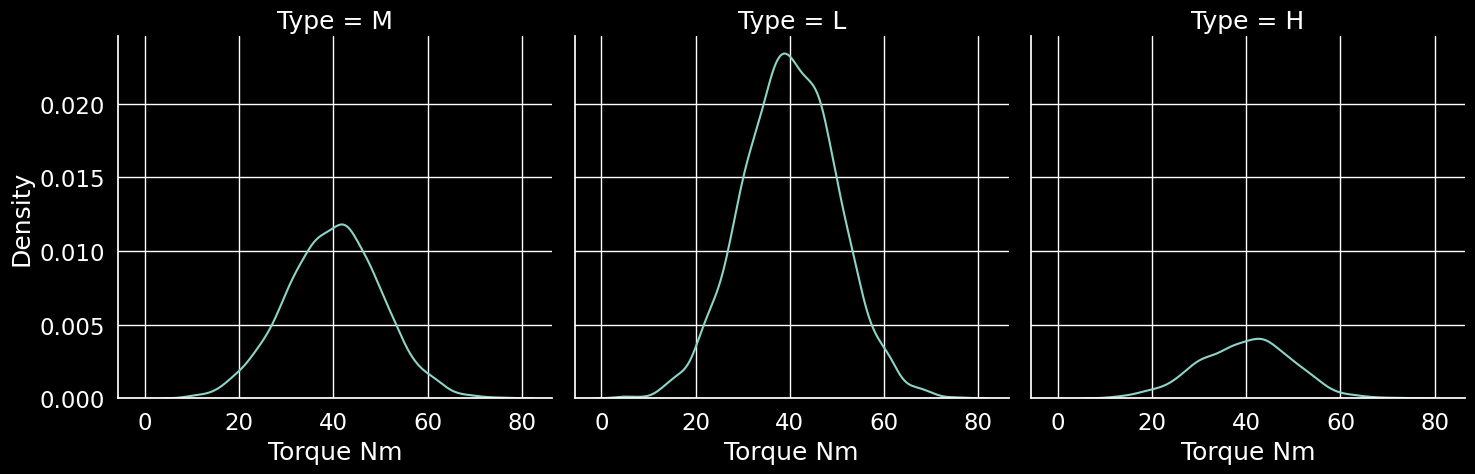

In [30]:
sns.displot(data=df, x="Torque Nm", col="Type", kind="kde");

findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

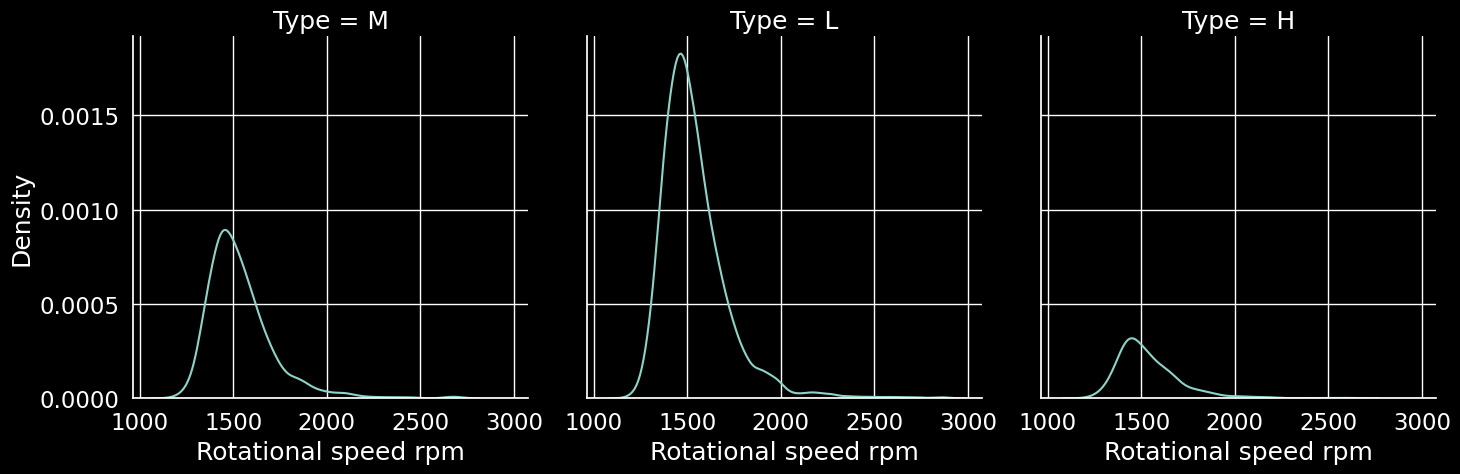

In [31]:


sns.displot(data=df, x="Rotational speed rpm", col="Type", kind="kde");



findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucid

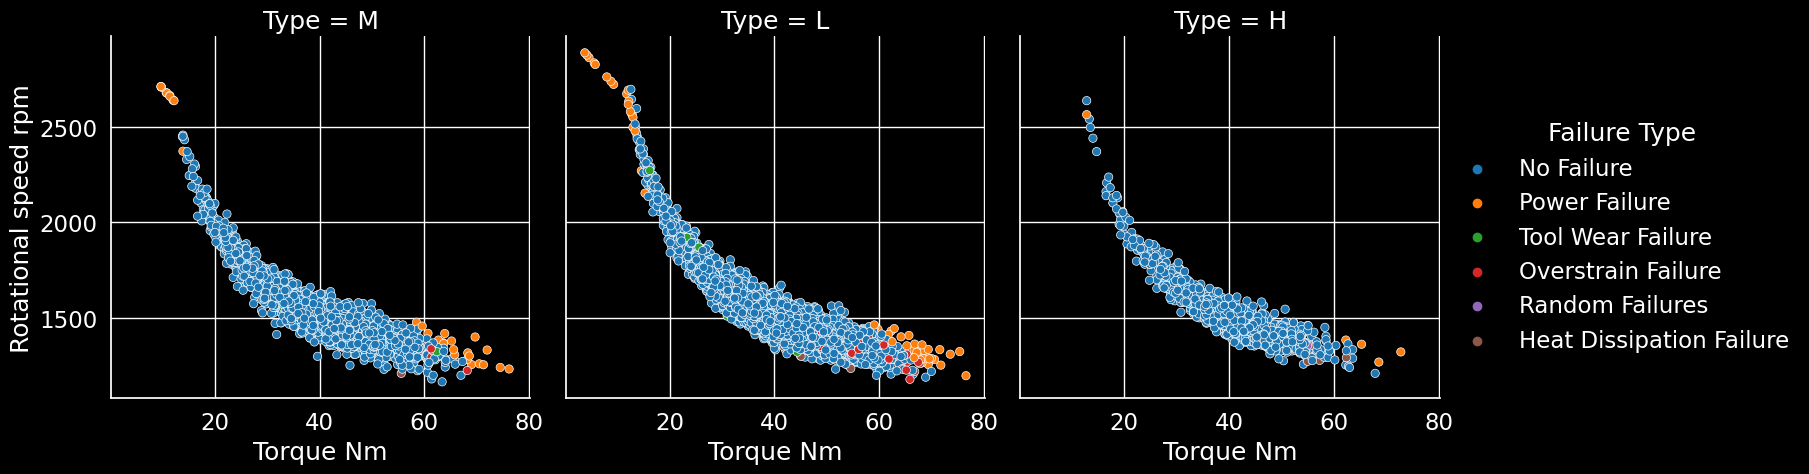

In [32]:
sns.relplot(data=df, x="Torque Nm", y="Rotational speed rpm", hue="Failure Type",col="Type",palette='tab10');